In [6]:
import torch
import tensorflow as tf
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

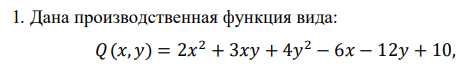

Будем искать значение функции при маленьких изменениях и если значение стремится к минимуму значит мы движемся к экстремуму

# $\frac{12}{23}$ и $\frac{30}{23}$ что примерно 0,52 и 1,30 соответственно

In [2]:
def q1(x, y):
  return  2 * x ** 2 + 3 * x * y + 4 * y ** 2 - 6 * x - 12 * y + 10

x, y = 1.52, 2.3
eps = 1e-6
res_x = (q1(x + eps, y) - q1(x, y)) / eps
res_y = (q1(x, y + eps) - q1(x, y)) / eps

while abs(res_x) > 0.01 and abs(res_y) > 0.01:
  x -= (res_x / 10)
  y -= (res_x / 10)

  res_x = (q1(x + eps, y) - q1(x, y)) / eps
  res_y = (q1(x, y + eps) - q1(x, y)) / eps

print('Значение функции в точке x:', round(res_x, 3))
print('Значение функции в точке y:', round(res_y, 3))
print(f'Значение x = {x:.2f} Значение y = {y:.2f}'.format(x, y))

Значение функции в точке x: 0.005
Значение функции в точке y: -0.001
Значение x = 0.52 Значение y = 1.30


Довольно неплохо! Но не буду лукавить, я вас развел😁

Не указан learning rate как раз с помощью которого мы будем двигаться, а learning rate у нас 0.1 что на самом деле очень много

In [3]:
x, y = 0, 0
eps = 1e-6
learning_rate = 0.01

res_x = (q1(x + eps, y) - q1(x, y)) / eps
res_y = (q1(x, y + eps) - q1(x, y)) / eps

while abs(res_x) > eps and abs(res_y) > eps:
    x -= learning_rate * res_x
    y -= learning_rate * res_y

    res_x = (q1(x + eps, y) - q1(x, y)) / eps
    res_y = (q1(x, y + eps) - q1(x, y)) / eps

print('Значение функции в точке x:', round(res_x, 3))
print('Значение функции в точке y:', round(res_y, 3))
print(f'Значение x = {x:.2f} Значение y = {y:.2f}'.format(x, y))

Значение функции в точке x: 0.0
Значение функции в точке y: -0.0
Значение x = 0.52 Значение y = 1.30


Конечно можно было и использовать уменьшение при приблежении, но поверхность, видимо легкая и нам это не мешает, проверим на рандомных значениях что мы не падаем в локальный минимум

In [4]:
def check_mins(x, y, eps=1e-6, lr=0.01):
  res_x = (q1(x + eps, y) - q1(x, y)) / eps
  res_y = (q1(x, y + eps) - q1(x, y)) / eps

  while abs(res_x) > eps and abs(res_y) > eps:
    x -= learning_rate * res_x
    y -= learning_rate * res_y

    res_x = (q1(x + eps, y) - q1(x, y)) / eps
    res_y = (q1(x, y + eps) - q1(x, y)) / eps

  print(f'Q = {x:.2f}, {y:.2f} | '.format(x, y), end=' ')

for _ in range(7):
  x = np.random.uniform(-1e3, 1e3)
  y = np.random.uniform(-1e3, 1e3)

  check_mins(x, y)
  print(f'Значения = {x:.2f}, {y:.2f}'.format(x, y))

Q = 0.52, 1.30 |  Значения = 958.94, -149.19
Q = 0.52, 1.30 |  Значения = -403.99, -172.46
Q = 0.52, 1.30 |  Значения = -442.46, 416.71
Q = 0.52, 1.30 |  Значения = 826.50, 95.94
Q = 0.52, 1.30 |  Значения = 669.21, 241.02
Q = 0.52, 1.30 |  Значения = -216.15, -650.70
Q = 0.52, 1.30 |  Значения = 30.53, 850.98


In [7]:
x, y = 100, 200
eps = 1e-6
learning_rate = 0.01

# Вычисление градиента
res_x = (q1(x + eps, y) - q1(x, y)) / eps
res_y = (q1(x, y + eps) - q1(x, y)) / eps

# Списки для хранения траектории
x_values = [x]
y_values = [y]
z_values = [q1(x, y)]

# Градиентный спуск
while abs(res_x) > eps and abs(res_y) > eps:
    x -= learning_rate * res_x
    y -= learning_rate * res_y

    # Пересчет градиента
    res_x = (q1(x + eps, y) - q1(x, y)) / eps
    res_y = (q1(x, y + eps) - q1(x, y)) / eps

    # Сохранение текущих значений для визуализации
    x_values.append(x)
    y_values.append(y)
    z_values.append(q1(x, y))

# Создание сетки значений для функции
x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = q1(X, Y)

# Создание 3D-графика с использованием plotly
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.8)])

# Добавление траектории градиентного спуска
fig.add_trace(go.Scatter3d(x=x_values, y=y_values, z=z_values, mode='lines+markers', marker=dict(size=5, color='red')))

# Настройка осей
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    title='Градиентный спуск для функции q1(x, y)'
)

fig.show()

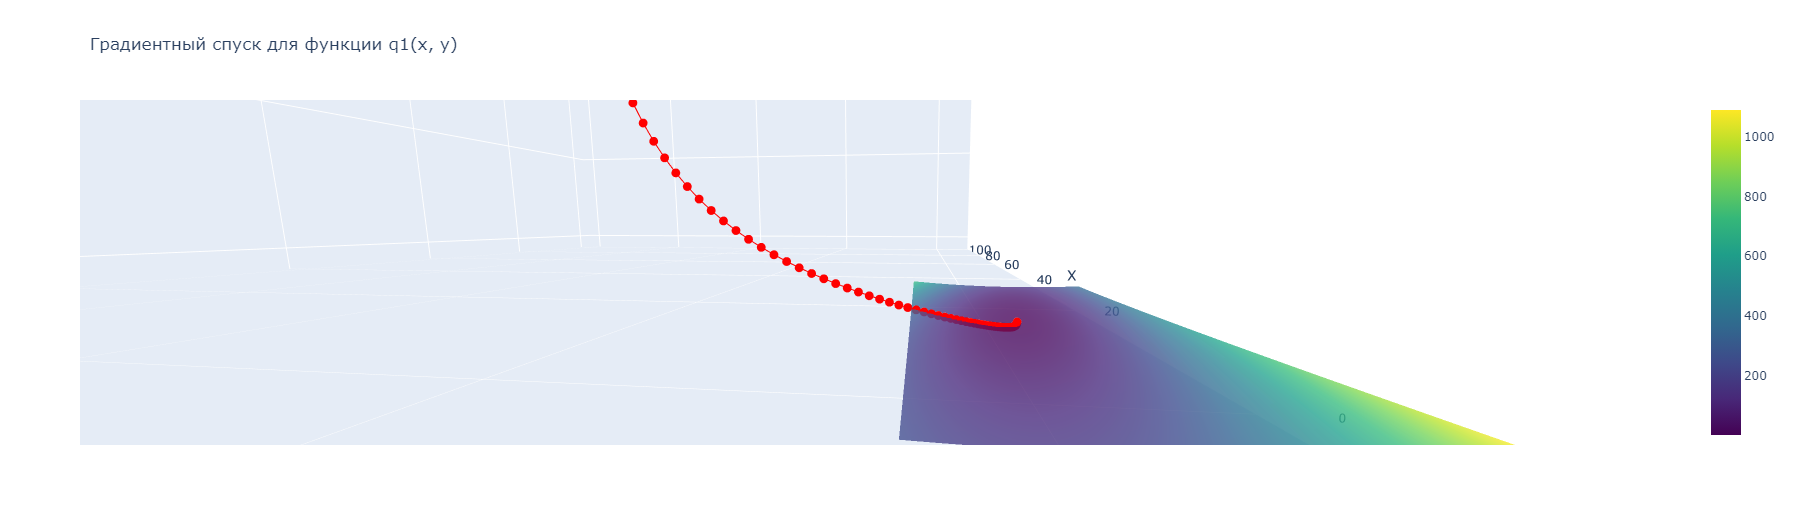

Здорово! А теперь решим 2 задание и используем TensorFlow и PyTorch

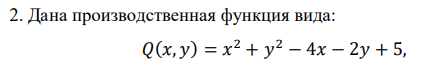

In [8]:
def q2(x, y):
    return 2*x**2 + 3*x*y + 4*y**2 - 6*x - 12*y + 10

x_range = np.linspace(-10, 10, 100)
y_range = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = q2(X, Y)

fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.8)])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    title='Градиентный спуск для функции q1(x, y)'
)

fig.show()

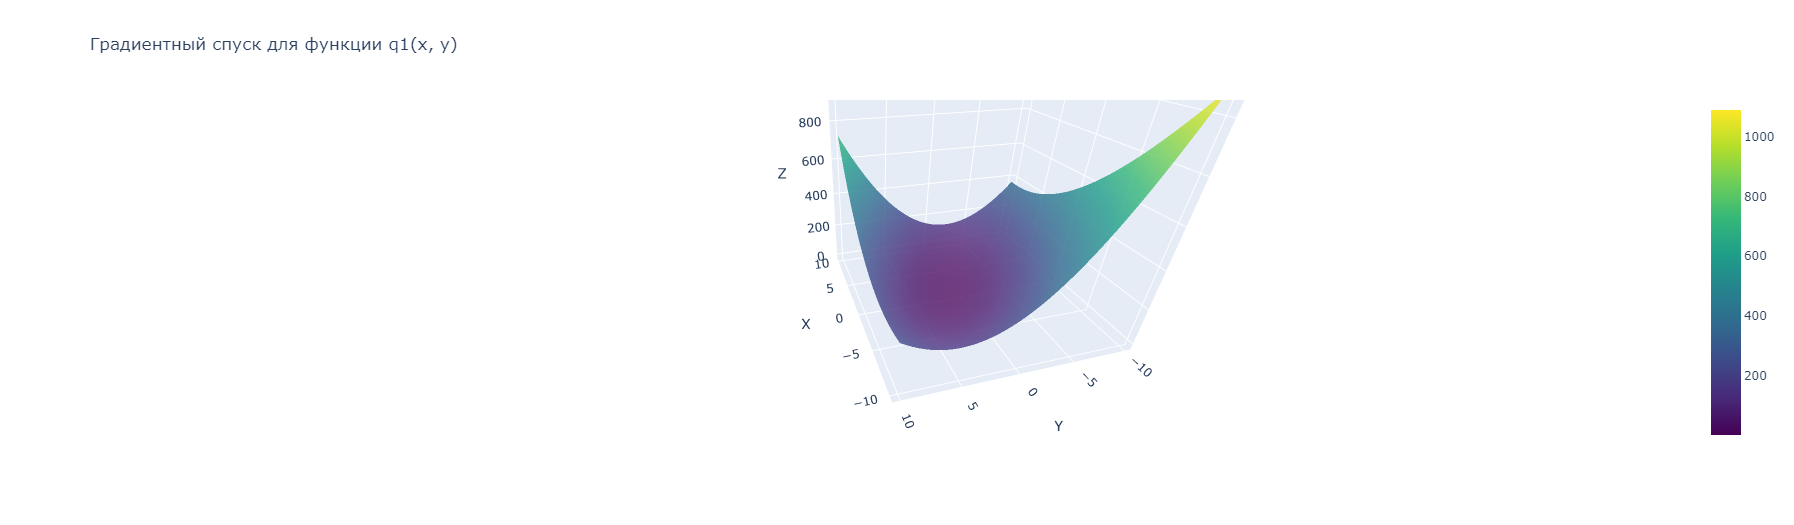

Видимо проверок для локальных минимумов не будет😢

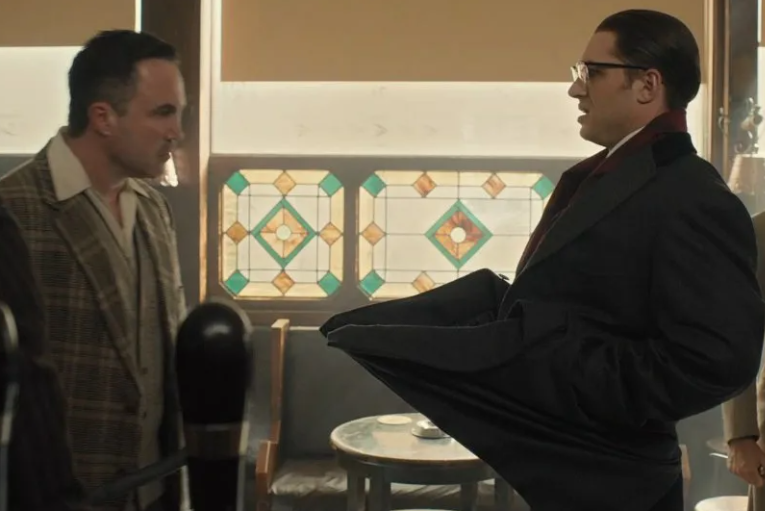

requires_grad=True - указываем что мы будем вычислять градиенты

loss.backward() - вычисляет градиенты всех переменных, которые участвовали в вычислении loss

In [19]:
def q2(x, y):
    return x**2 + y**2 - 4*x - 2*y + 5

x = torch.tensor(0.0, requires_grad=True)
y = torch.tensor(0.0, requires_grad=True)

learning_rate = 0.01

for _ in range(1000):
    loss = q2(x, y)
    loss.backward()

    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad

    x.grad.zero_()
    y.grad.zero_()

print(f'Значение x = {x.item():.2f}, Значение y = {y.item():.2f}')

Значение x = 2.00, Значение y = 1.00


In [18]:
def q2(x, y):
    return x**2 + y**2 - 4*x - 2*y + 5

x = tf.Variable(0.0, dtype=tf.float32)
y = tf.Variable(0.0, dtype=tf.float32)

eps = 1e-6
learning_rate = 0.01

optimizer = tf.optimizers.SGD(learning_rate)

def loss_function():
    return q2(x, y)

for _ in range(1000):
    with tf.GradientTape() as tape:
        loss = loss_function()
    grads = tape.gradient(loss, [x, y])
    optimizer.apply_gradients(zip(grads, [x, y]))

print(f'Значение x = {x.numpy():.2f}, Значение y = {y.numpy():.2f}')

Значение x = 2.00, Значение y = 1.00


# Проверка

In [24]:
def check_mins(x, y, lr=0.01):
  for _ in range(1000):
      loss = q2(x, y)
      loss.backward()

      with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad

      x.grad.zero_()
      y.grad.zero_()

  print(f'Q = {x:.2f}, {y:.2f} | '.format(x, y), end=' ')

for _ in range(7):
  x = np.random.uniform(-1e3, 1e3)
  y = np.random.uniform(-1e3, 1e3)

  x2 = torch.tensor(x, requires_grad=True)
  y2 = torch.tensor(y, requires_grad=True)

  check_mins(x2, y2)
  print(f'Значения = {x:.2f}, {y:.2f}'.format(x, y))

Q = 2.00, 1.00 |  Значения = 243.53, -423.83
Q = 2.00, 1.00 |  Значения = -158.03, -311.37
Q = 2.00, 1.00 |  Значения = -961.53, -237.45
Q = 2.00, 1.00 |  Значения = -849.12, 280.95
Q = 2.00, 1.00 |  Значения = 885.29, 684.44
Q = 2.00, 1.00 |  Значения = 112.87, 331.57
Q = 2.00, 1.00 |  Значения = 356.75, -478.73


В заключение сделаю иллюстрацию с помощью Tensorflow и plotly, где будет показан путь из точки (-4, -30) за 100 итераций двух оптимизаторов: **SGD, RMSProb**

Adam и его улучшения двигаются медленее и подобно RMSProb

In [40]:
def q2(x, y):
    return x**2 + y**2 - 4*x - 2*y + 5

x_init, y_init = -4.0, -30.0

learning_rate = 0.01
iterations = 100

optimizers = {
    'SGD': tf.optimizers.SGD(learning_rate),
    'RMSprop': tf.optimizers.RMSprop(learning_rate)
}

paths = {name: {'x': [], 'y': [], 'z': []} for name in optimizers.keys()}

for name, optimizer in optimizers.items():
    x = tf.Variable(x_init, dtype=tf.float32)
    y = tf.Variable(y_init, dtype=tf.float32)

    for _ in range(iterations):
        with tf.GradientTape() as tape:
            loss = q2(x, y)
        grads = tape.gradient(loss, [x, y])
        optimizer.apply_gradients(zip(grads, [x, y]))

        paths[name]['x'].append(x.numpy())
        paths[name]['y'].append(y.numpy())
        paths[name]['z'].append(loss.numpy())

    print(f'{name}: x = {x.numpy():.2f}, y = {y.numpy():.2f}')

fig = go.Figure()

x_range = np.linspace(-50, 50, 100)
y_range = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = q2(X, Y)

fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.8, showscale=False, name='Function Surface'))

colors = ['red', 'blue', 'yellow']
for (name, path), color in zip(paths.items(), colors):
    fig.add_trace(go.Scatter3d(x=path['x'], y=path['y'], z=path['z'], mode='lines+markers', name=name, marker=dict(size=3, color=color)))

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        bgcolor='rgba(0,0,0,0)'
    ),
    title='Оптимизация функции q2(x, y) с использованием различных оптимизаторов',
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

fig.show()

SGD: x = 1.20, y = -3.11
RMSprop: x = -2.92, y = -28.91


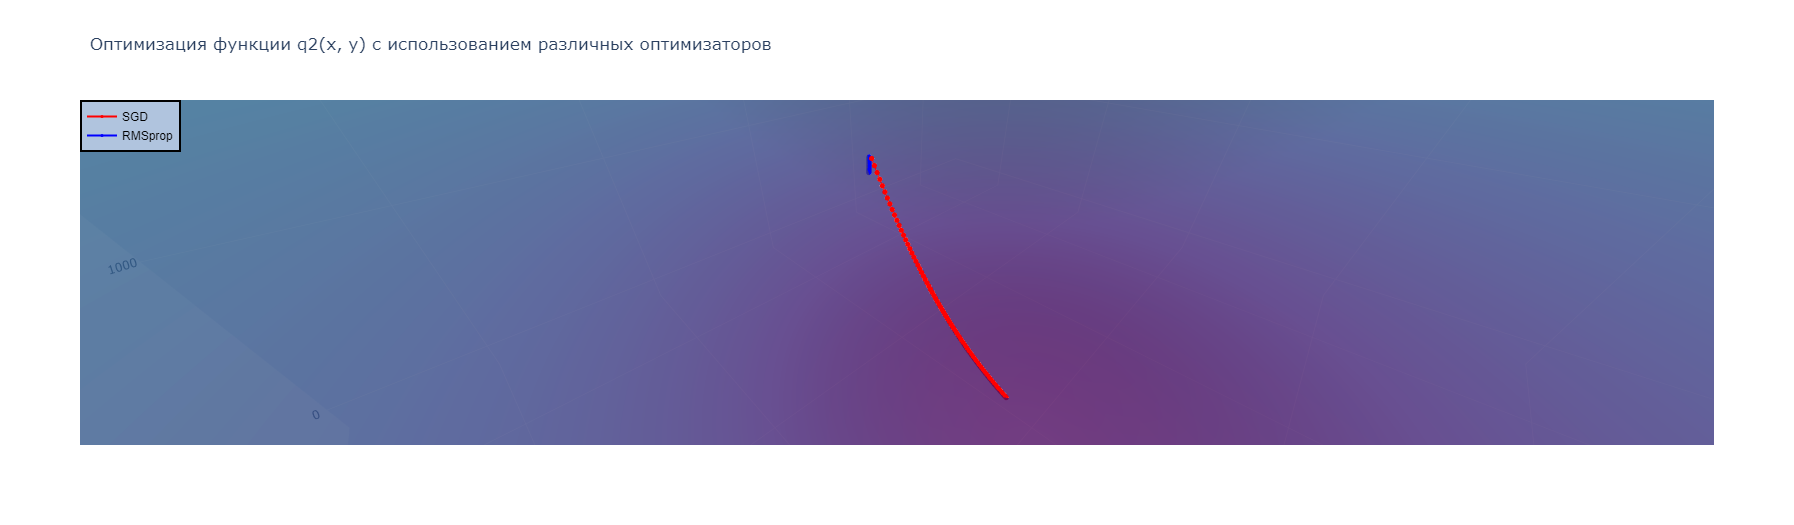